In [155]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 8.0)

In [62]:
# This notebook is for analyzing the 2017 /r/NBA survey results

votes = pd.read_csv('NBA End of Year Voting.csv')
votes.head()

,Timestamp,Who is in your All-NBA 1st Team?,Who is in your All-NBA 2nd Team?,Who is in your All-NBA 3rd Team?,Who is in your All-Defensive 1st Team?|,Who is in your All-Defensive 2nd Team?,Who is in your All-Rookie 1st Team?,Who is in your All-Rookie 2nd Team?,Who is your NBA MVP?,Who would you vote 2nd for NBA MVP?,...,Who would you vote 2nd for NBA Defensive Player of the Year?,Who would you vote 3rd for NBA Defensive Player of the Year?,What is your favorite NBA team?,How old are you?,What is your ethnicity?,What is your education level?,What is your gender?,What country are you from?,"If from the United States, what state?",Unnamed: 34
0,2017/04/11 8:08:44 PM AST,G - James Harden (DAL);G - Russell Westbrook (...,G - Isaiah Thomas (BOS);G - Stephen Curry (GSW...,G - DeMar DeRozan (TOR);G - John Wall (WAS);F ...,G - Patrick Beverley (HOU);G - Marcus Smart (B...,G - Andre Roberson (OKC);G - Avery Bradley (BO...,Malcolm Brogdon (MIL);Joel Embiid (PHI);Dario ...,Willy Hernangomez (NYK);Alex Abrines (OKC);Yog...,Russell Westbrook (OKC),James Harden (HOU),...,Draymond Green (GSW),Kawhi Leonard (SAS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017/04/12 3:08:44 AM AST,G - James Harden (DAL);G - Russell Westbrook (...,G - Chris Paul (LAC);G - Stephen Curry (GSW);F...,G - Isaiah Thomas (BOS);G - Kyle Lowry (TOR);F...,G - Chris Paul (LAC);G - John Wall (WAS);F - D...,G - Marcus Smart (BOS);G - Avery Bradley (BOS)...,Malcolm Brogdon (MIL);Joel Embiid (PHI);Dario ...,Willy Hernangomez (NYK);Alex Abrines (OKC);Bud...,Russell Westbrook (OKC),James Harden (HOU),...,Kawhi Leonard (SAS),Rudy Gobert (UTA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017/04/12 4:17:50 AM AST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russell Westbrook (OKC),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017/04/12 10:44:46 AM AST,G - James Harden (DAL);G - Russell Westbrook (...,G - Isaiah Thomas (BOS);G - Stephen Curry (GSW...,G - Chris Paul (LAC);G - Damian Lillard (POR);...,G - Tony Allen (MEM);G - Chris Paul (LAC);F - ...,G - Danny Green (SAS);G - Patrick Beverley (HO...,Malcolm Brogdon (MIL);Joel Embiid (PHI);Dario ...,Willy Hernangomez (NYK);Alex Abrines (OKC);Jay...,Kawhi Leonard (SAS),LeBron James (CLE),...,Rudy Gobert (UTA),Draymond Green (GSW),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017/04/12 12:27:46 PM AST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russell Westbrook (OKC),James Harden (HOU),...,Draymond Green (GSW),Hassan Whiteside (MIA),Toronto Raptors,22 to 25 years old,Asian / Pacific Islander,Completed some college,Male,Canada,New York,Single


In [63]:
# Let's start with some EDA on demographics

demographics = votes[[u'What is your favorite NBA team?', u'How old are you?',
                      u'What is your ethnicity?', u'What is your education level?',
                      u'What is your gender?', u'What country are you from?',
                      u'If from the United States, what state?', u'Unnamed: 34']]
demographics.columns = ["team", "age", "ethnicity", "education", "gender", "country", "state", "marital_status"]
demographics["id"] = demographics.index
demographics.head()

/Users/jaymahabal/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,team,age,ethnicity,education,gender,country,state,marital_status,id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,Toronto Raptors,22 to 25 years old,Asian / Pacific Islander,Completed some college,Male,Canada,New York,Single,4


In [64]:
# How does gender and race breakdown by team -- anything interesting?
# Have to exclude several responses because people can't grow up
# Do I exclude responses, or categorize them into 'other'?

genders = ["Male", "Female", "Prefer not to say"]
# demographics.groupby("gender").count()["id"].sort_values()

gender_pd = demographics
gender_pd["gender"] = demographics["gender"].map(lambda x: x if x in genders else "Other")
gender_pd = gender_pd[gender_pd["gender"].isin(genders + ["Other"])]

gender_pd.groupby(["gender"]).count()["id"]

/Users/jaymahabal/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


gender
Female                113
Male                 7119
Other                 226
Prefer not to say      68
Name: id, dtype: int64

In [65]:
demographics.groupby("gender").count()["id"].sort_values()
demographics.isnull().sum()


team               127
age                132
ethnicity          271
education          187
gender               0
country            964
state             2487
marital_status    6543
id                   0
dtype: int64

In [66]:
teams = ['Toronto Raptors', 'Sacramento Kings',
         'Minnesota Timberwolves', 'San Antonio Spurs',
         'Portland Trail Blazers', 'Los Angeles Lakers', 'Houston Rockets',
         'Cleveland Cavaliers',
         'Golden State Warriors', 'New York Knicks', 'Oklahoma City Thunder',
         'LA Clippers', 'Boston Celtics', 'Denver Nuggets', 'Chicago Bulls',
         'Detroit Pistons', 'Phoenix Suns', 'Philadelphia 76ers',
         'Milwaukee Bucks', 'Washington Wizards', 'Brooklyn Nets',
         'Miami Heat', 'Atlanta Hawks', 'Indiana Pacers',
         'New Orleans Pelicans', 'Utah Jazz', 'Charlotte Hornets',
         'Orlando Magic', 'Memphis Grizzlies', 'Dallas Mavericks',
         'Seattle Super Sonics']

In [67]:
print set(demographics["team"].unique()) - set(teams)

set([nan, 'No preference', 'Basketball', 'Whoever the Warriors are playing on a given night. ', 'It changes all the time ', 'NBA', 'No Favorite', 'None', "Don't have a fave - just enjoy the league", 'LeBron James', "Don't have one yet", 'TNT Bulls', 'Whoever is currently playing against Lebron', 'No favorite ', 'Whatever team LeBron is on', 'Kristaps Porzingis', 'Rochester Kings', 'I Love Basketball', 'No favorites ', 'No favorite', 'Lebron James', 'Minas T\xc3\xaanis Clube', 'Neutral', 'New Jersey Nets', 'Penis', 'The Dwight Howard Shoulders', "USA Men's Basketball Team", 'No one', 'None of the above', 'Vancouver Grizzlies', "Don't have one. ", "I'm from northern Canada and don't follow one specific team.", 'Cincinnati Royals', 'Bandwagoner from Poland here', 'Team LeBron', 'Washington Generals', 'Waipuk Wizards', "Virginia Beach's Future NBA Expansion Team", "I'm between teams but rock Grizzlies flair", "Don't have one", 'ur mum', 'Do not have one', 'None at the moment', 'I love bask

In [68]:
demographics["team"].unique()

array([nan, 'Toronto Raptors', 'Sacramento Kings',
       'Minnesota Timberwolves', 'San Antonio Spurs',
       'Portland Trail Blazers', 'Los Angeles Lakers', 'Houston Rockets',
       'Cleveland Cavaliers', 'Washongton Wizards',
       'Golden State Warriors', 'New York Knicks', 'Oklahoma City Thunder',
       'LA Clippers', 'Boston Celtics', 'Denver Nuggets', 'Chicago Bulls',
       'Detroit Pistons', 'Phoenix Suns', 'Philadelphia 76ers',
       'Milwaukee Bucks', 'Washington Wizards', 'Brooklyn Nets',
       'Miami Heat', 'Atlanta Hawks', 'Indiana Pacers',
       'New Orleans Pelicans', 'Utah Jazz', 'Charlotte Hornets',
       'Orlando Magic', 'Memphis Grizzlies', 'Dallas Mavericks',
       'Seattle Super Sonics', 'None', 'No team affiliation',
       'Do not have one', "Virginia Beach's Future NBA Expansion Team",
       'No favorite', 'It changes all the time ',
       'Waiting for a bandwagon', 'The Dwight Howard Shoulders',
       'None at the moment', 'idk', "USA Men's Basketb

In [69]:
demographics.groupby(["team"]).count()["id"].reset_index()


,team,id
0,Atlanta Hawks,87
1,Bandwagoner from Poland here,1
2,Basketball,1
3,Boston Celtics,578
4,Brooklyn Nets,76
5,Charlotte Hornets,47
6,Chicago Bulls,301
7,Cincinnati Royals,1
8,Cleveland Cavaliers,405
9,Dallas Mavericks,142


In [70]:
demographics["age"].unique()

array([nan, '22 to 25 years old', '18 to 21 years old',
       '26 to 29 years old', '41 to 44 years old', '14 to 17 years old',
       '30 to 33 years old', '37 to 40 years old', '56 to 59 years old',
       '60 years or older', '30 to 32 years old', '53 to 56 years old',
       '33 to 36 years old', '13 years or younger', '45 to 48 years old',
       '49 to 52 years old'], dtype=object)

In [71]:
ages =  ['13 years or younger', '14 to 17 years old', '18 to 21 years old', '22 to 25 years old', 
         '26 to 29 years old', '30 to 32 years old', '33 to 36 years old', '37 to 40 years old', 
         '41 to 44 years old', '45 to 48 years old', '49 to 52 years old', '53 to 56 years old', 
         '57 to 59 years old', '60 years or older']

# Problem is there's both a 53-56 and 56-59
# Thankfully there's only one person in the latter, so we'll classify that as 'other'

def clean_ages(s):
    if s in ages:
        return s
    if s == '60 years or older':
        return '57 years or older'
    return "Other"

In [100]:
demographics[(demographics["age"] == '57 to 59 years old')]

,team,age,ethnicity,education,gender,country,state,marital_status,id


In [90]:
demographics.groupby("team").count()
demographics[demographics["team"] == "New York Knicks"]

,team,age,ethnicity,education,gender,country,state,marital_status,id
16,New York Knicks,18 to 21 years old,Asian / Pacific Islander,Completed some college,Male,Canada,New York,Single,16
31,New York Knicks,26 to 29 years old,Black or African American,Completed some college,Male,United States,Louisiana,Single,31
43,New York Knicks,18 to 21 years old,White,Completed some college,Female,United Kingdom,Hawaii,Single,43
45,New York Knicks,26 to 29 years old,White,Master's Degree,Male,Latvia,Alabama,Married,45
74,New York Knicks,26 to 29 years old,Black or African American,Bachelor's Degree,Male,United States,New York,Single,74
142,New York Knicks,Other,NaN,NaN,Other,NaN,NaN,NaN,142
187,New York Knicks,18 to 21 years old,Asian / Pacific Islander,Completed some college,Male,United States,New York,Single,187
210,New York Knicks,18 to 21 years old,Black or African American,High school graduate,Male,NaN,New York,Single,210
247,New York Knicks,26 to 29 years old,Asian / Pacific Islander,Bachelor's Degree,Male,United States,New York,Single,247
272,New York Knicks,14 to 17 years old,Hispanic or Latino,Completed some high school,Male,USA,New York,Single,272


In [91]:
# Are GSW fans younger than other teams?
# More generally, how does each teams fanbase breakdown by age?

# Filter out weird team suggestions
team_age = demographics
team_age["team"] = demographics["team"].map(lambda x: x if x in teams else "Other")

# Filter out weird ages
team_age["age"] = team_age["age"].map(lambda x: clean_ages(x))
team_age = team_age.groupby(["team", "age"]).count()["id"].reset_index()

# Add in rows for each age range not already covered

for team in teams:
    for age in ages+["Other"]:
        if team_age[(team_age["team"] == team) & (team_age["age"] == age)].empty:
            temp_row = pd.DataFrame([team, age, 0]).T
            temp_row.columns = ["team", "age", "id"]
            team_age = pd.concat([team_age, temp_row], axis=0)

team_age = team_age.sort_values(["team", "age"]).reset_index(drop=True)

# Normalize by team

def normalize_age(row):
    return row["id"] / float(len(demographics[demographics["team"] == row["team"]]))

team_age["normalized_age"] = team_age.apply(lambda x: normalize_age(x), axis=1)
team_age

# Ready for a small multiples bar chart!

/Users/jaymahabal/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jaymahabal/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,team,age,id,normalized_age
0,Atlanta Hawks,13 years or younger,1,0.011494
1,Atlanta Hawks,14 to 17 years old,15,0.172414
2,Atlanta Hawks,18 to 21 years old,27,0.310345
3,Atlanta Hawks,22 to 25 years old,26,0.298851
4,Atlanta Hawks,26 to 29 years old,11,0.126437
5,Atlanta Hawks,30 to 32 years old,2,0.022989
6,Atlanta Hawks,33 to 36 years old,2,0.022989
7,Atlanta Hawks,37 to 40 years old,0,0.000000
8,Atlanta Hawks,41 to 44 years old,0,0.000000
9,Atlanta Hawks,45 to 48 years old,1,0.011494


Toronto Raptors


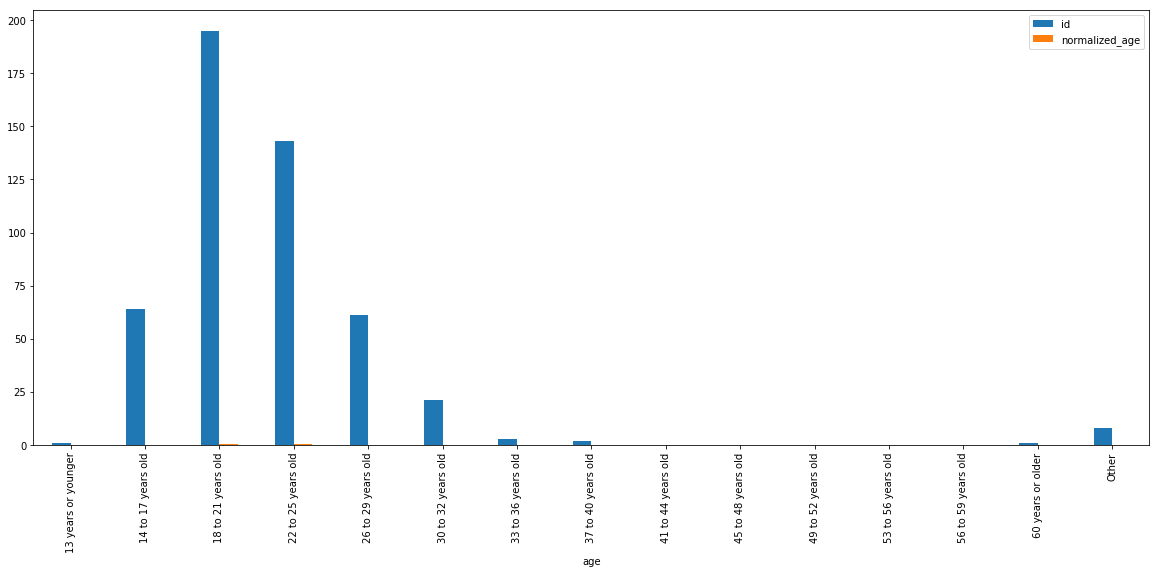

Sacramento Kings


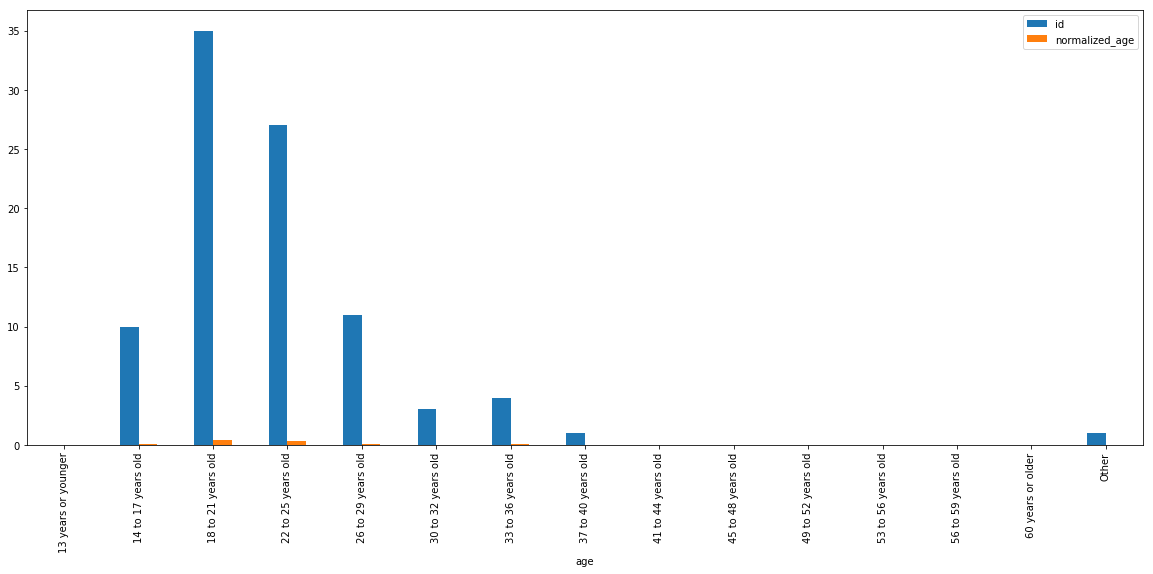

Minnesota Timberwolves


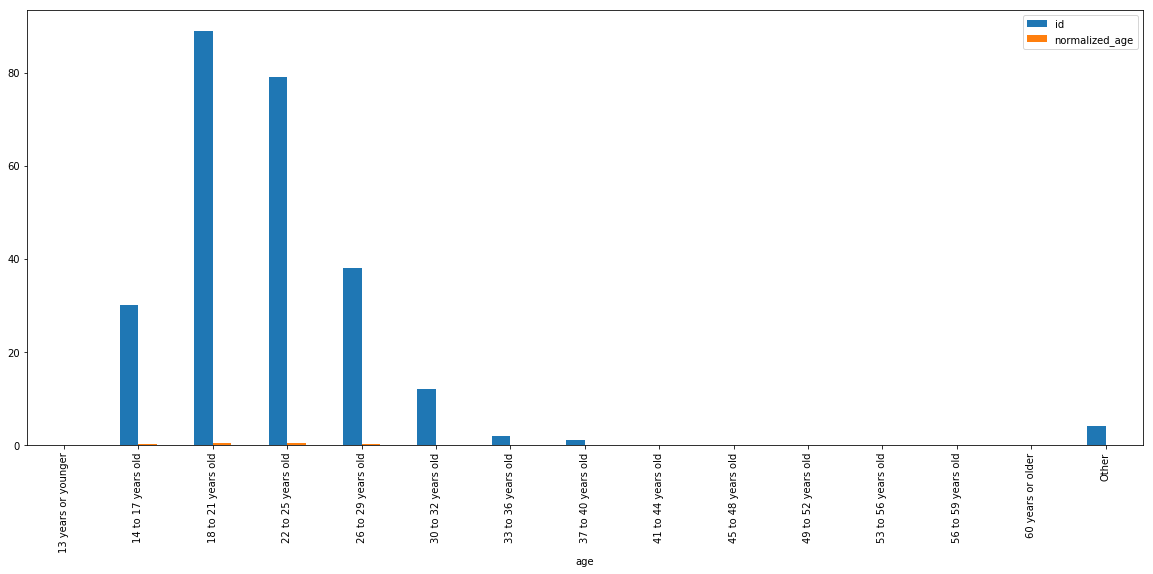

San Antonio Spurs


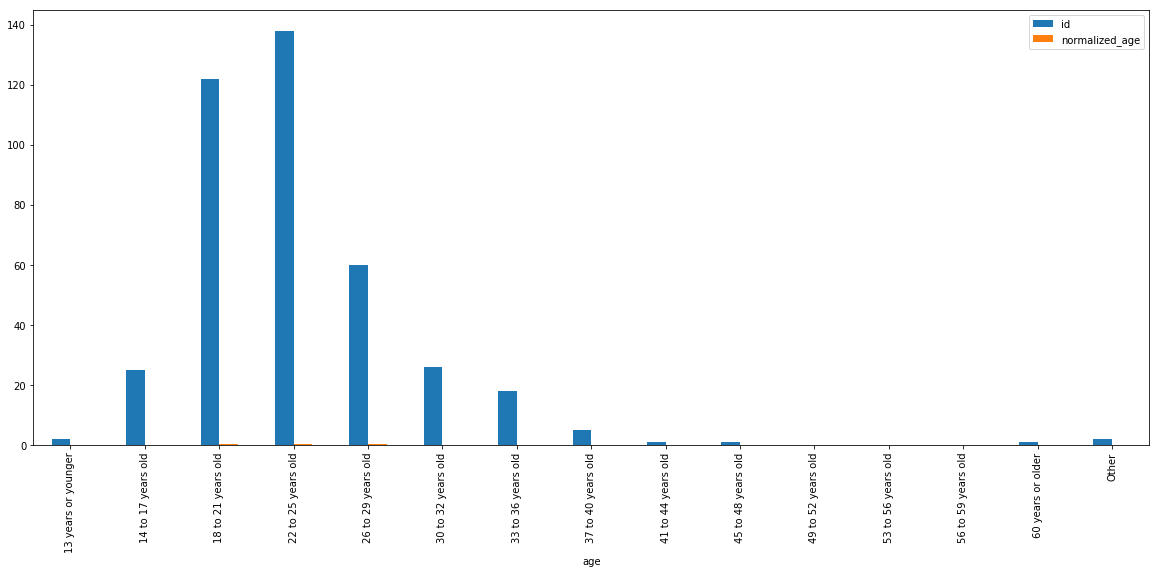

Portland Trail Blazers


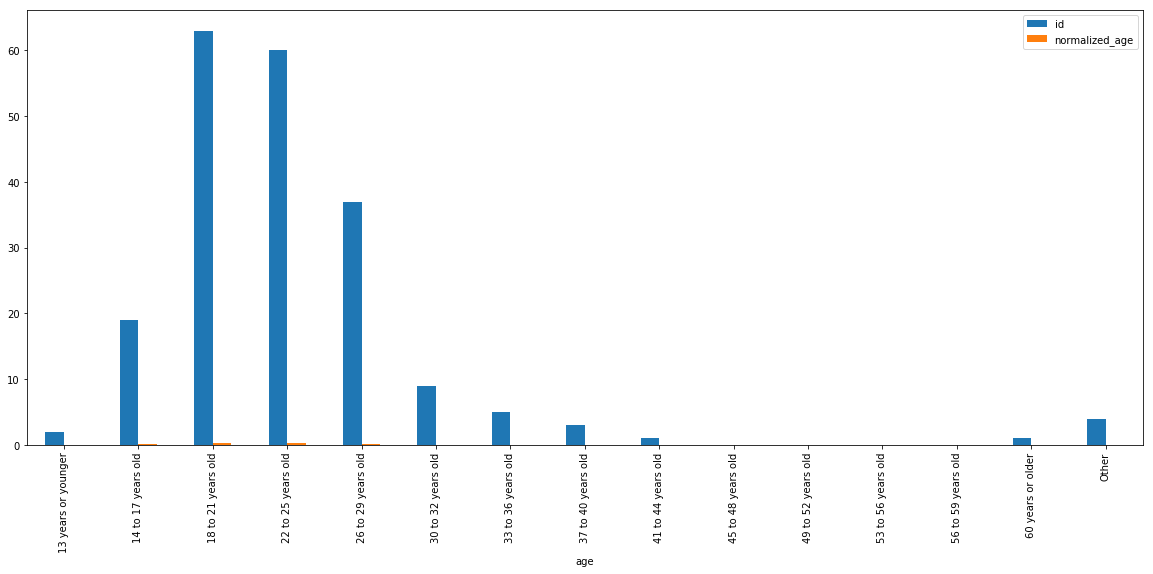

Los Angeles Lakers


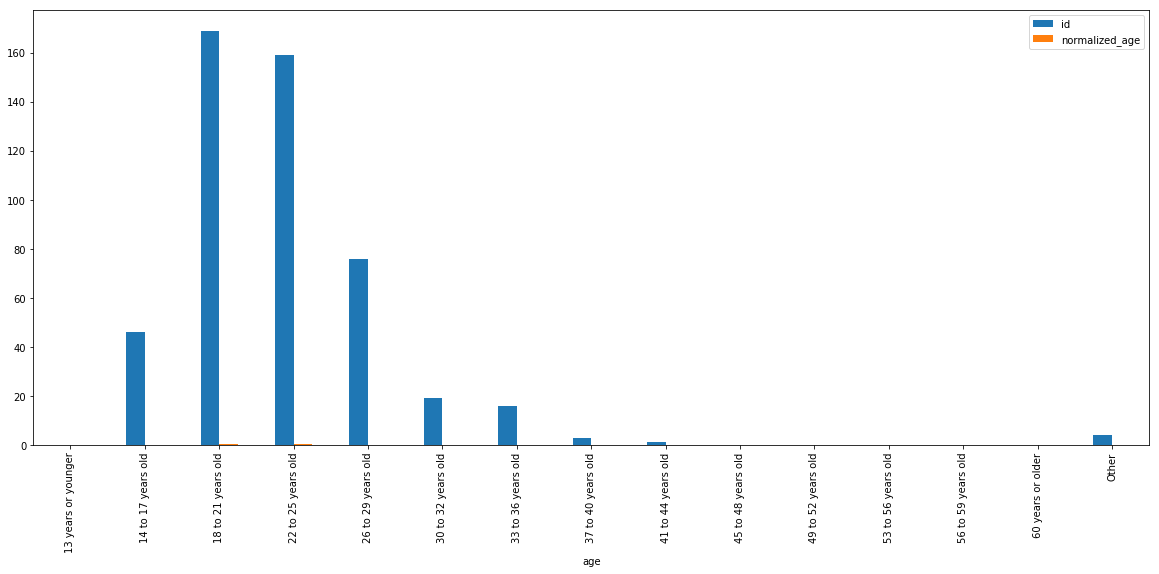

Houston Rockets


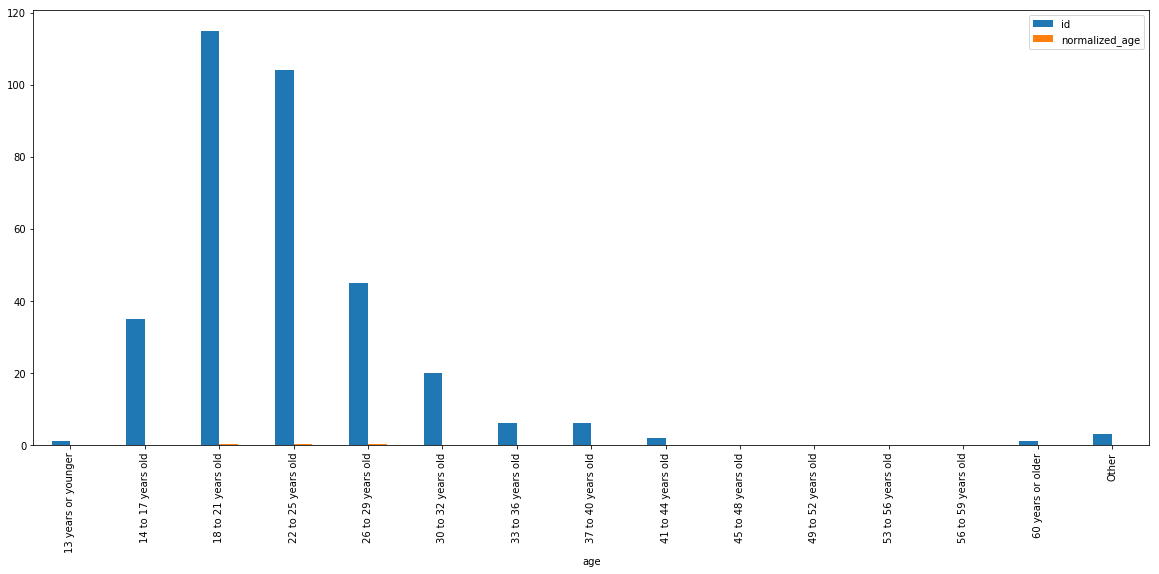

Cleveland Cavaliers


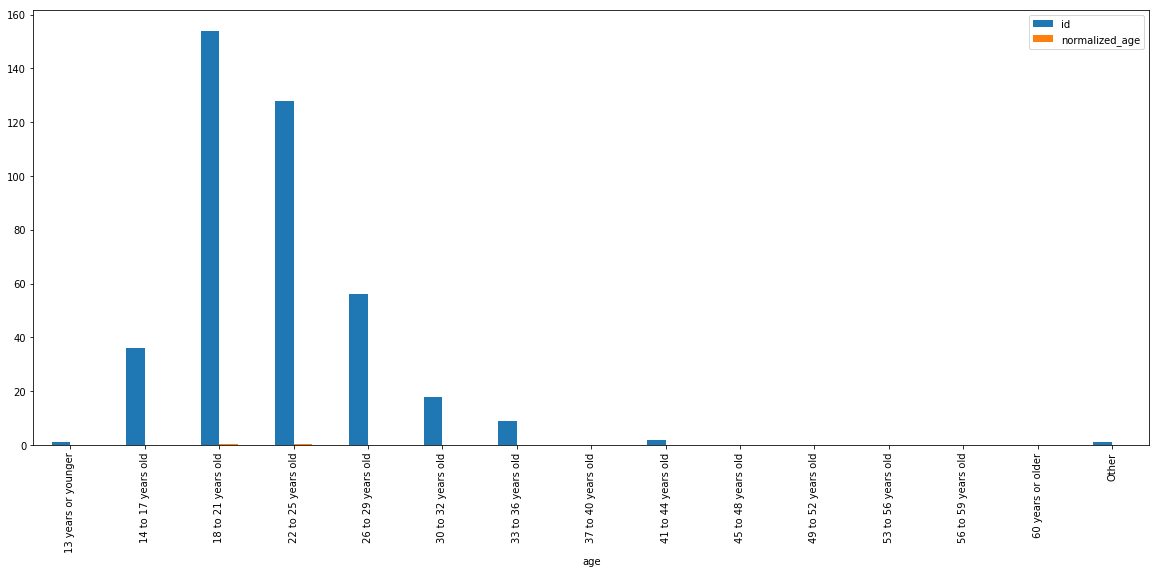

Golden State Warriors


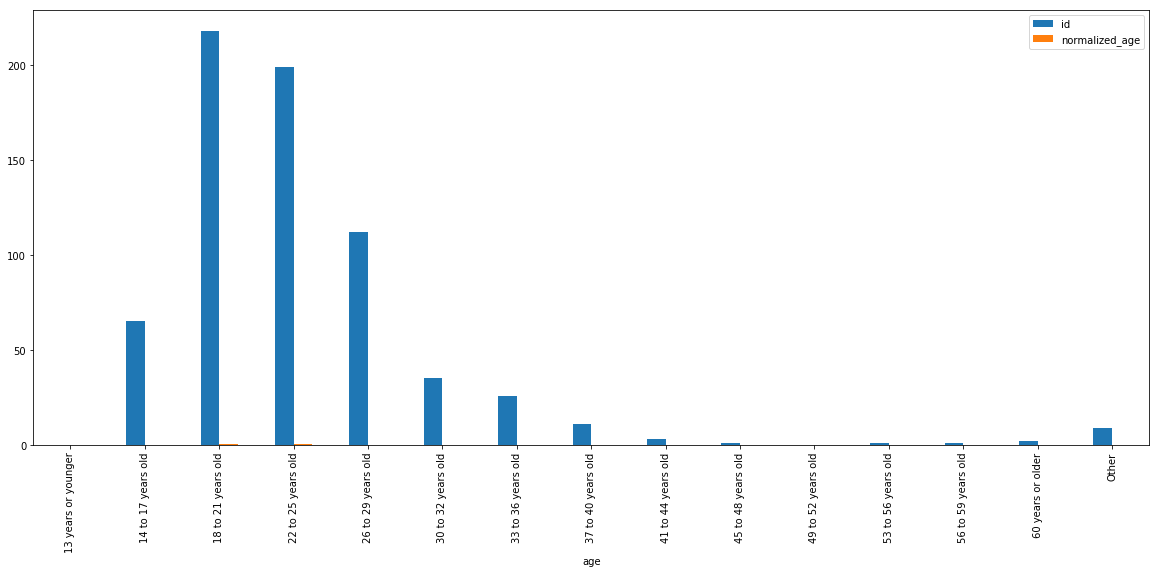

New York Knicks


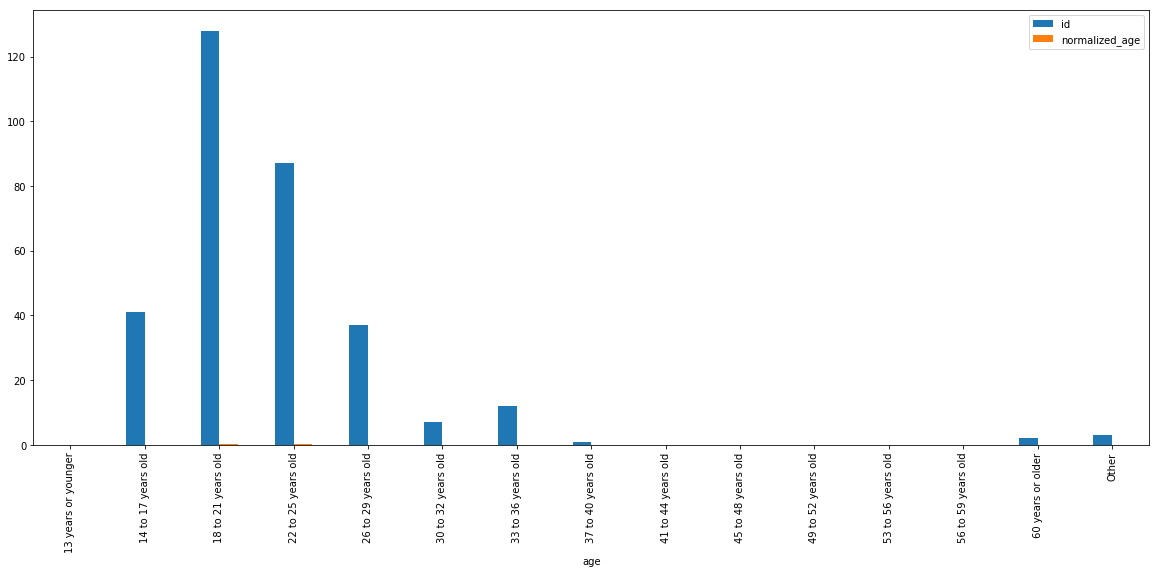

Oklahoma City Thunder


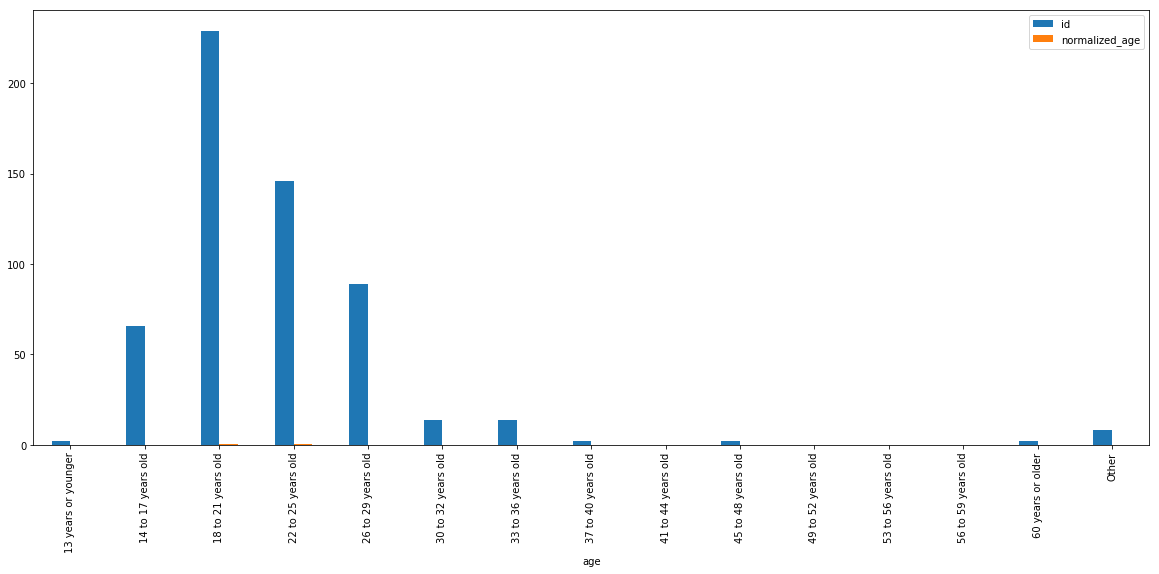

LA Clippers


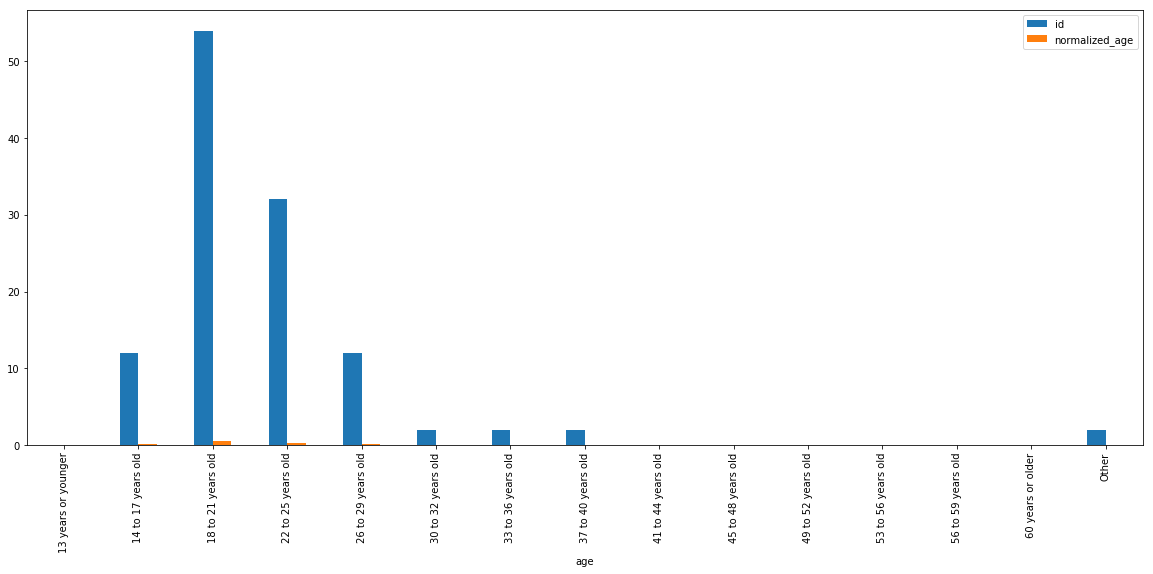

Boston Celtics


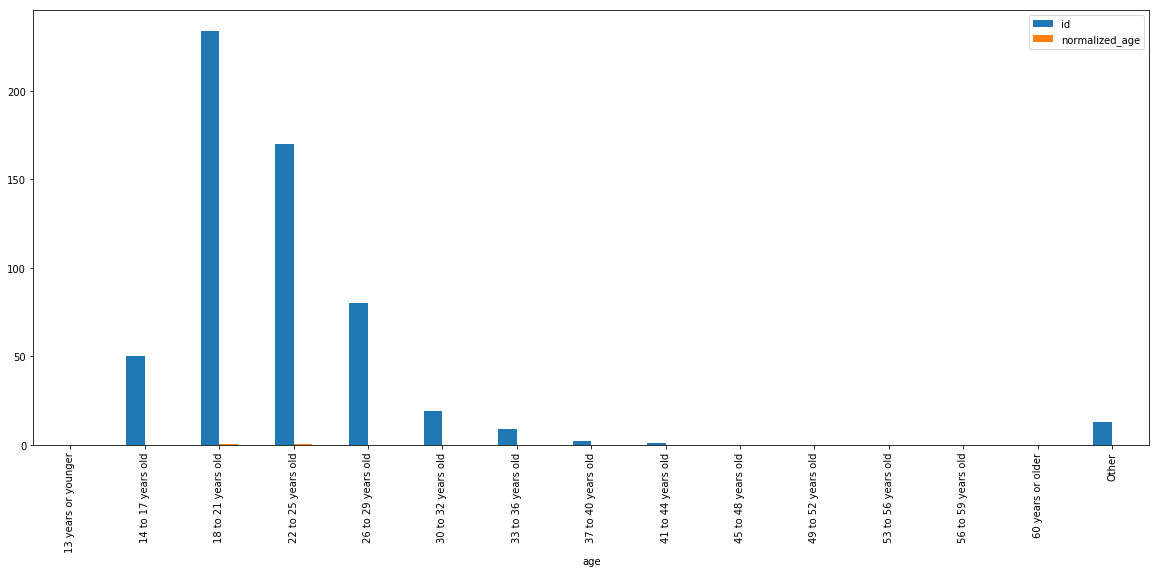

Denver Nuggets


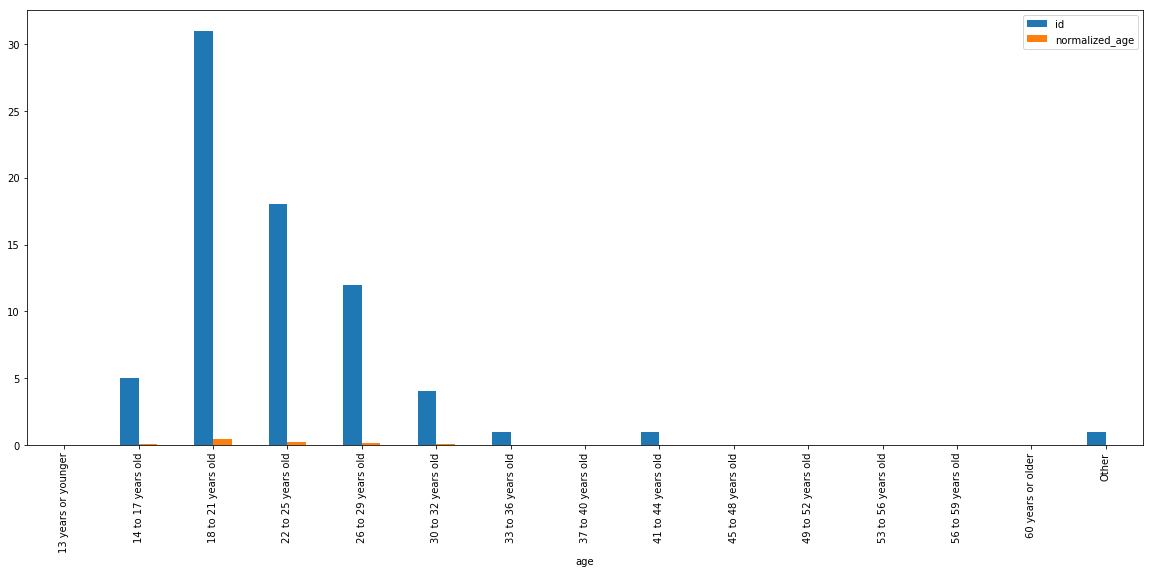

Chicago Bulls


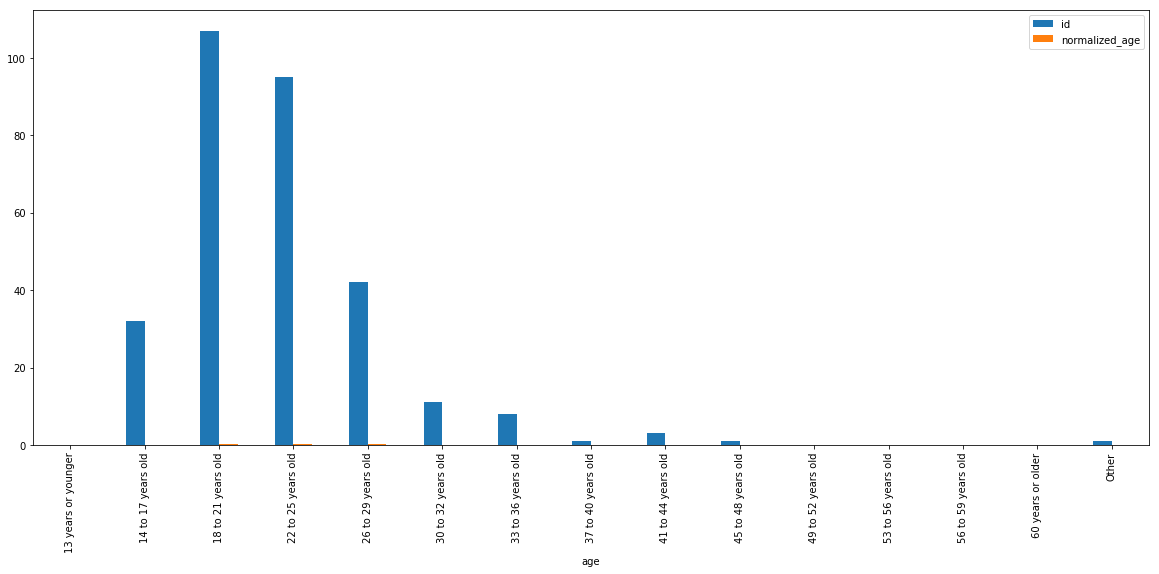

Detroit Pistons


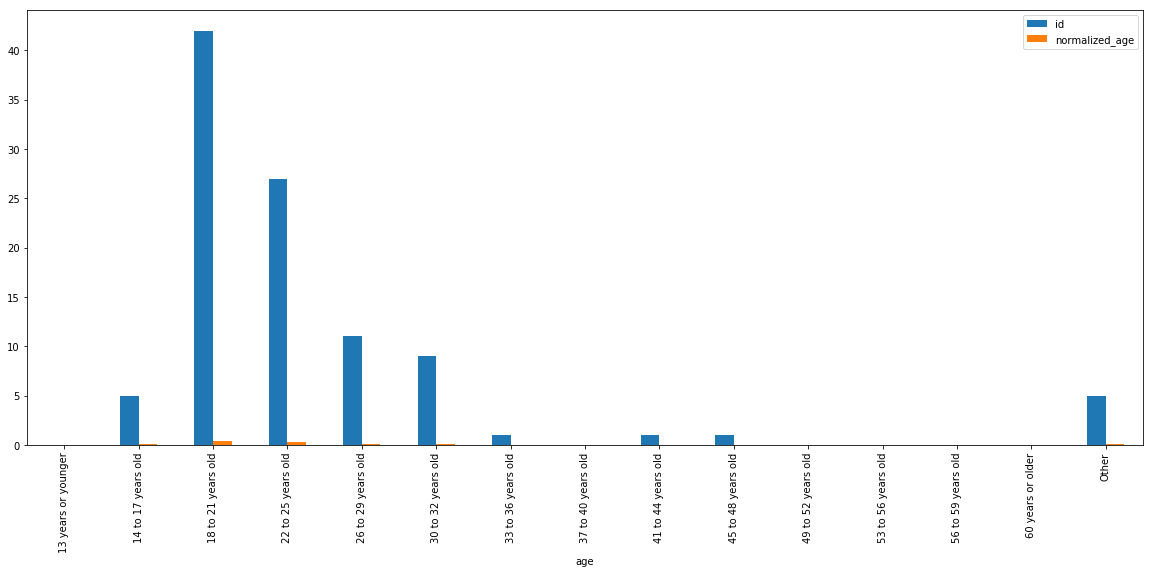

Phoenix Suns


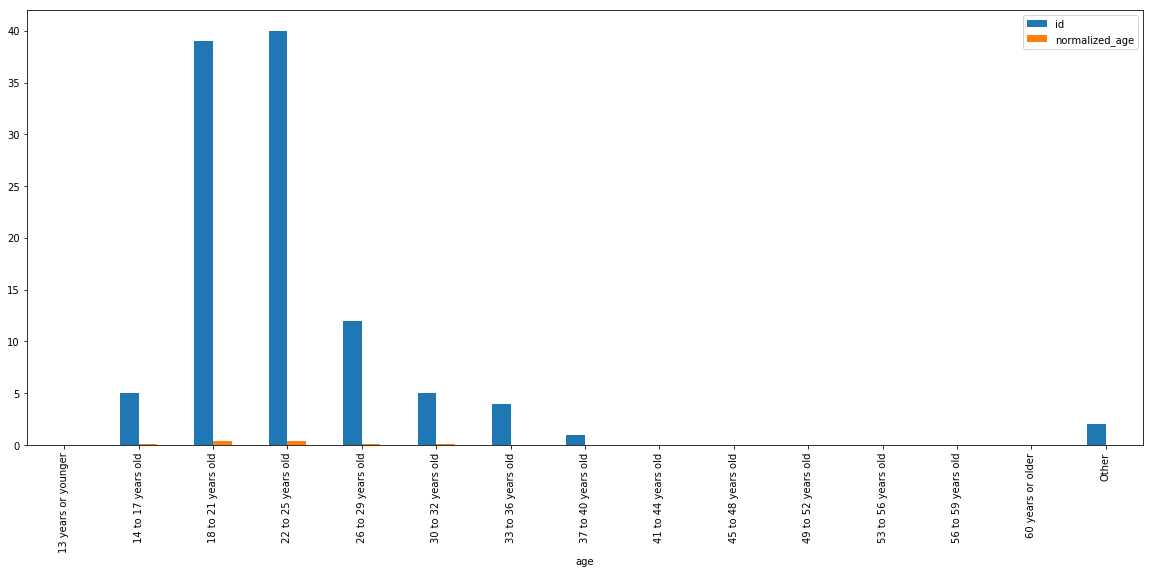

Philadelphia 76ers


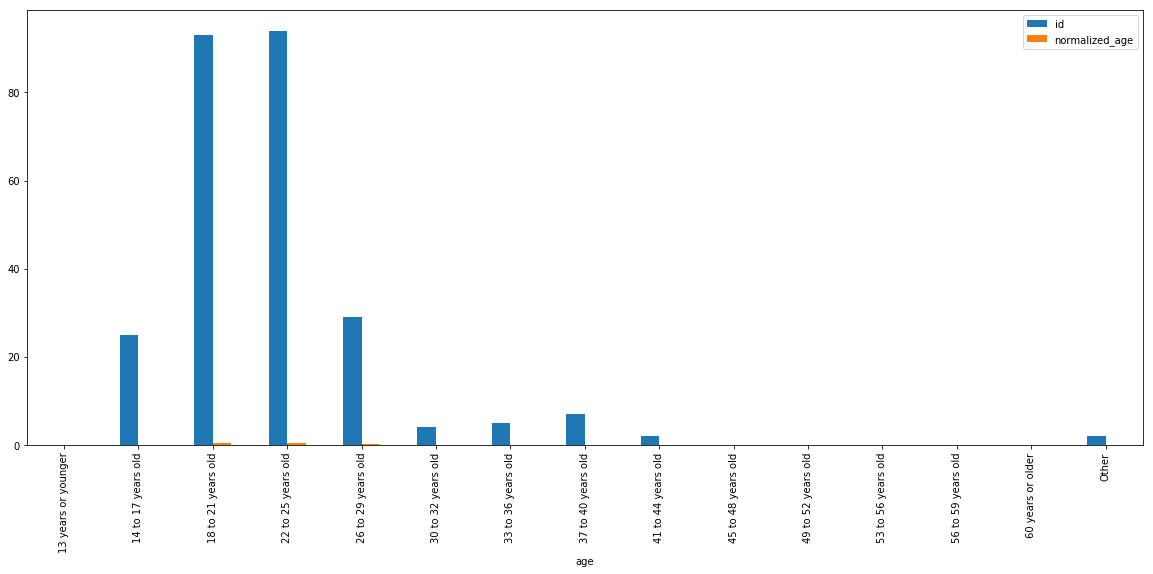

Milwaukee Bucks


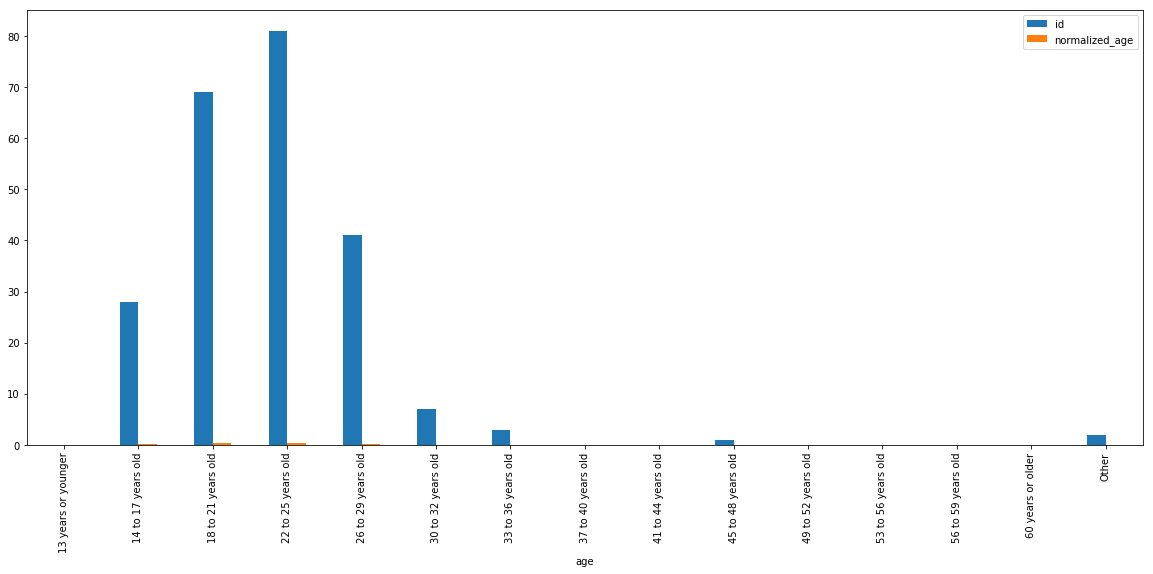

Washington Wizards


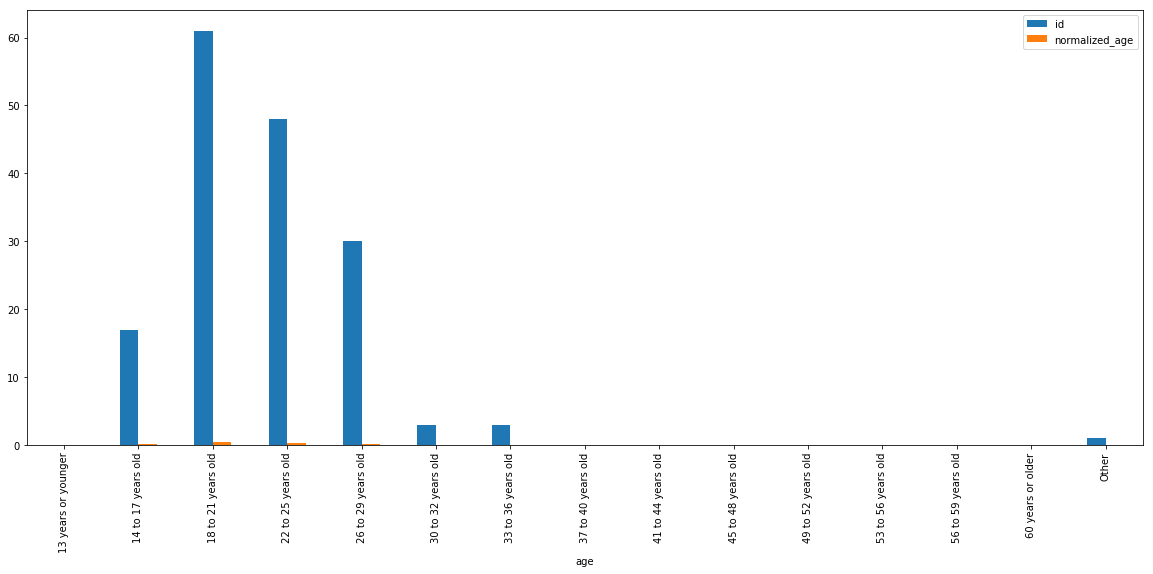

Brooklyn Nets


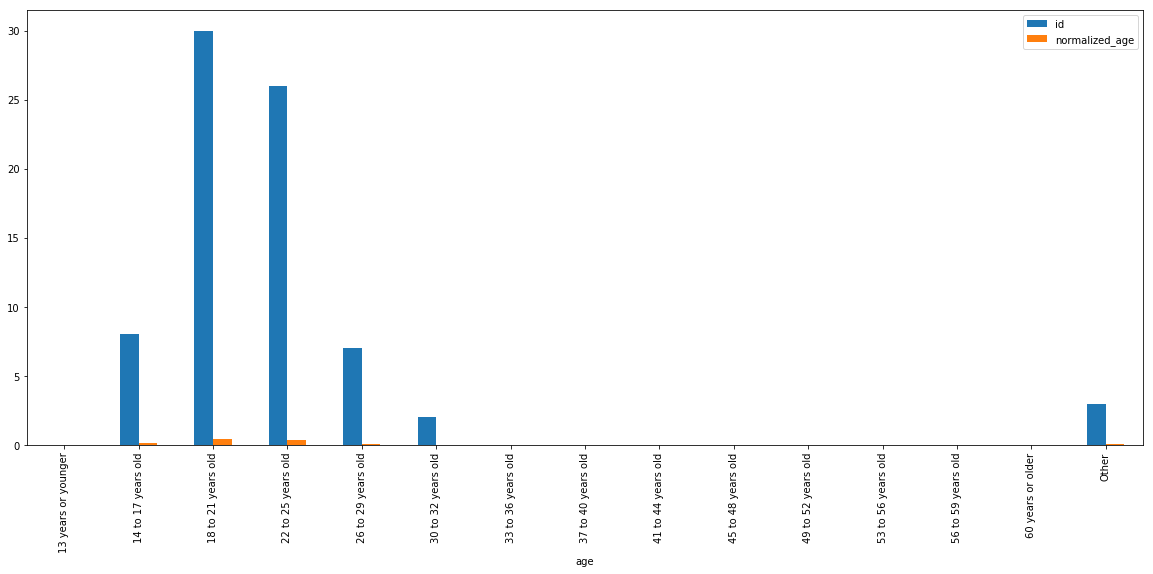

Miami Heat


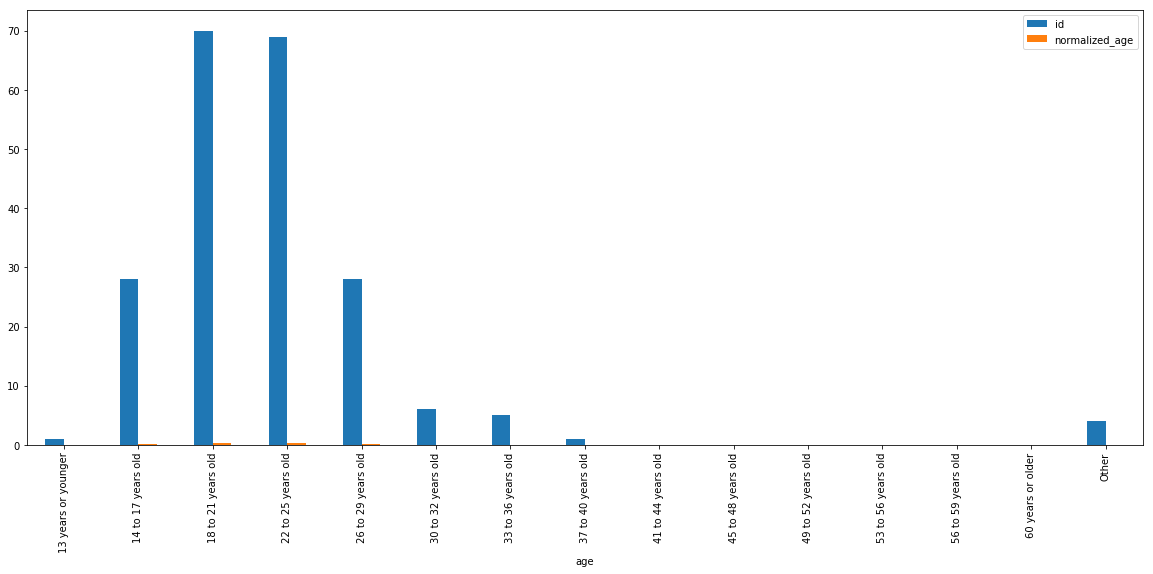

Atlanta Hawks


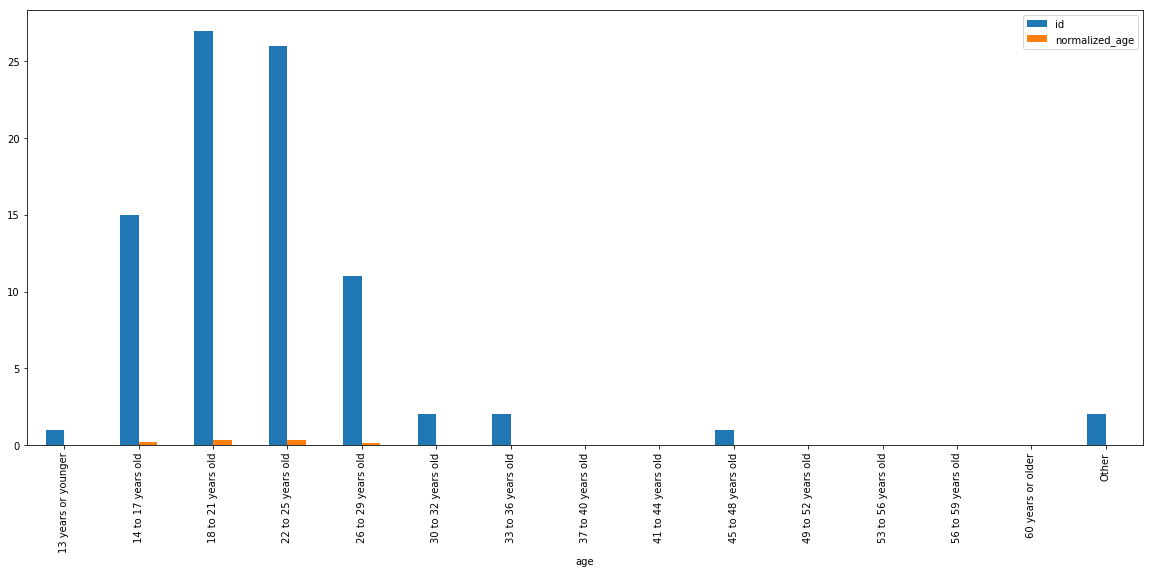

Indiana Pacers


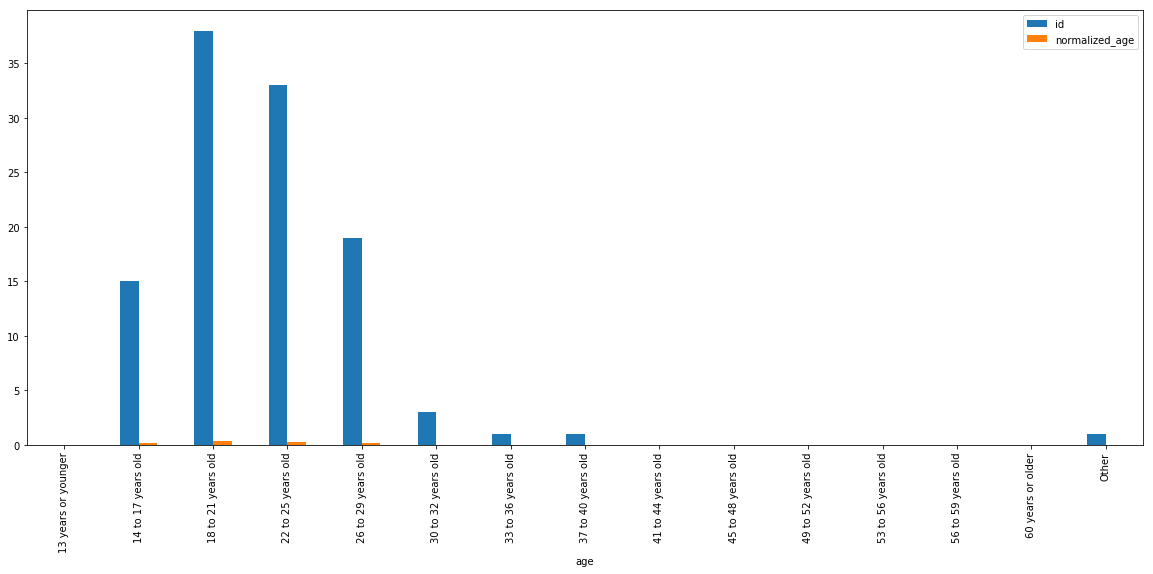

New Orleans Pelicans


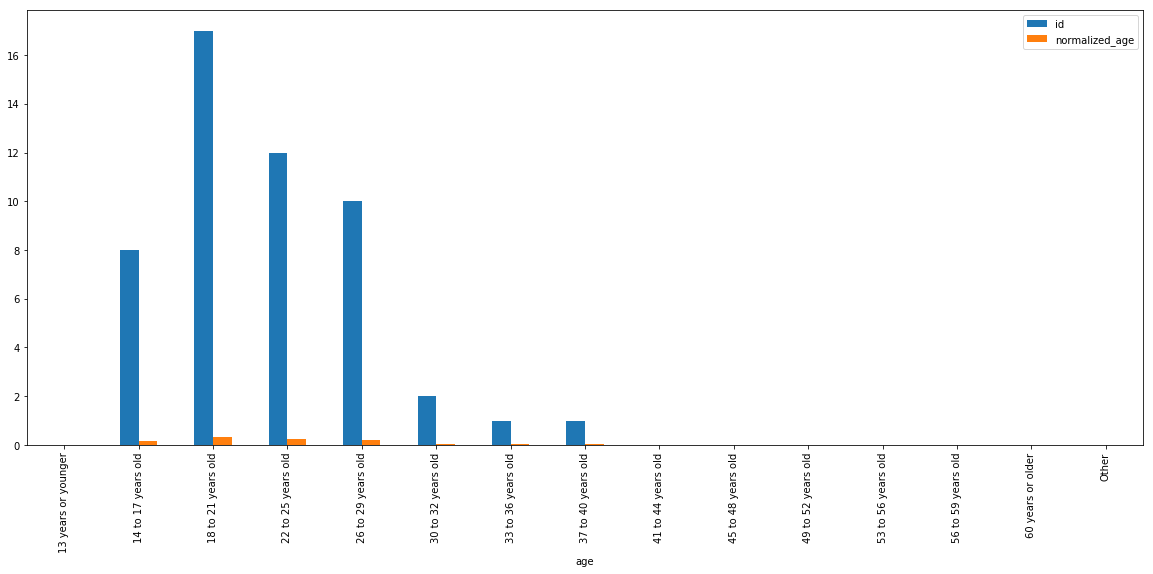

Utah Jazz


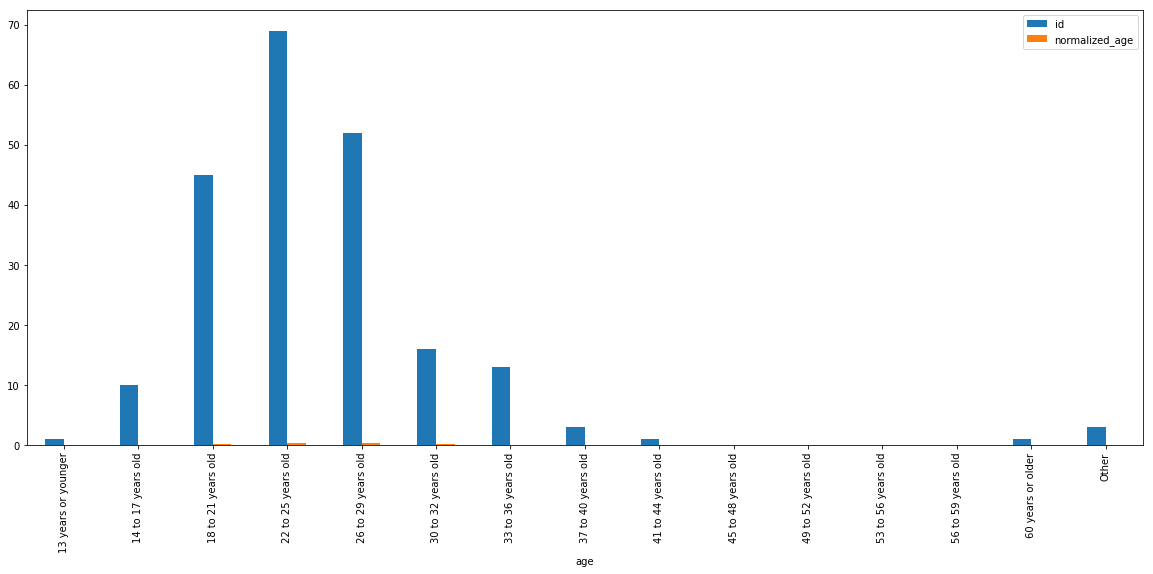

Charlotte Hornets


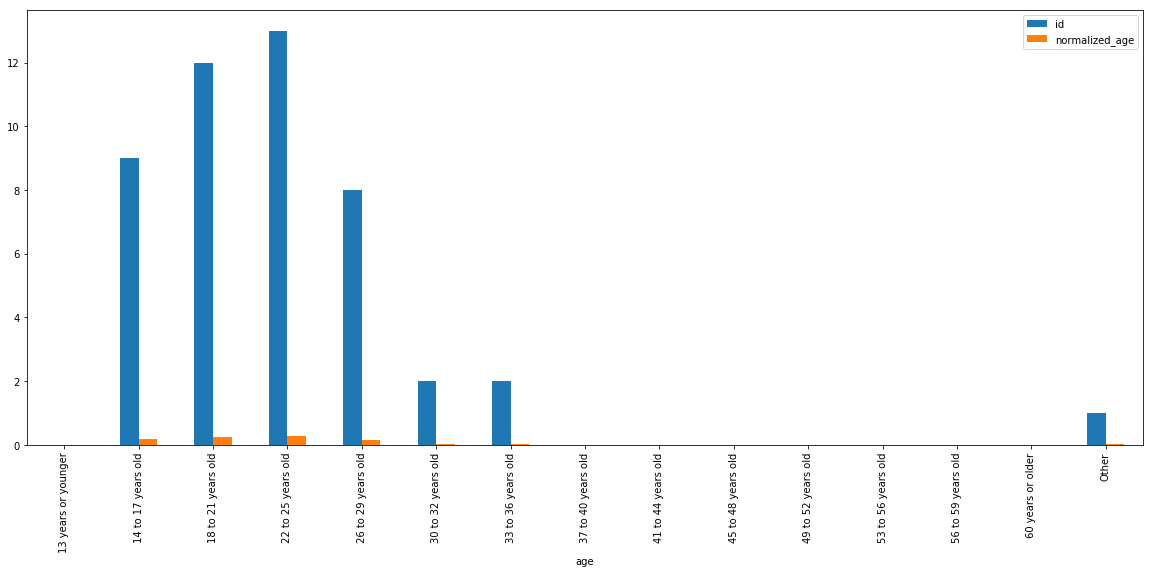

Orlando Magic


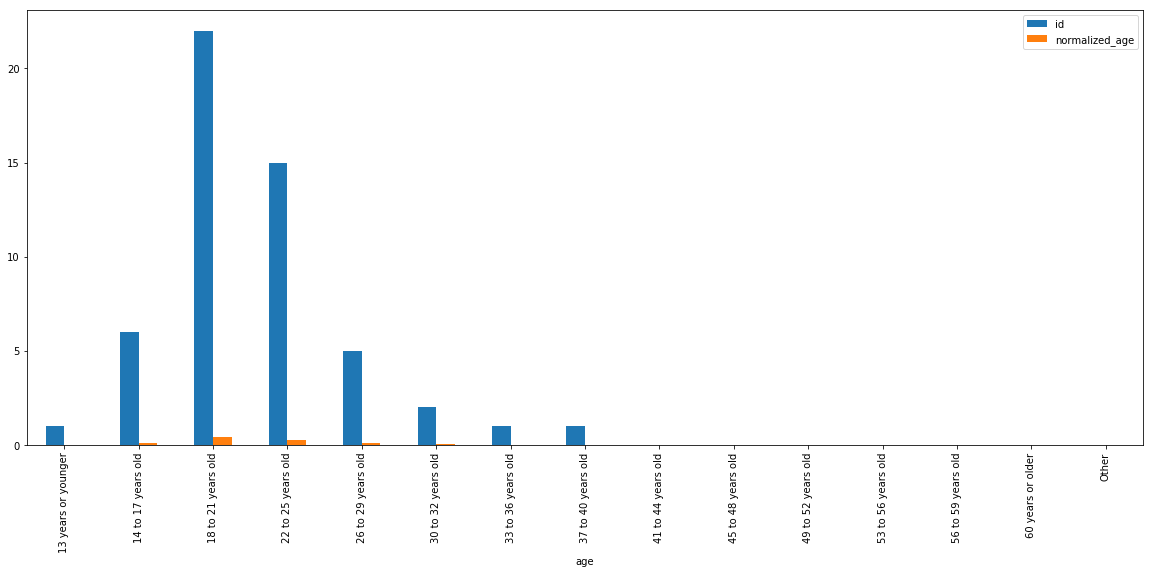

Memphis Grizzlies


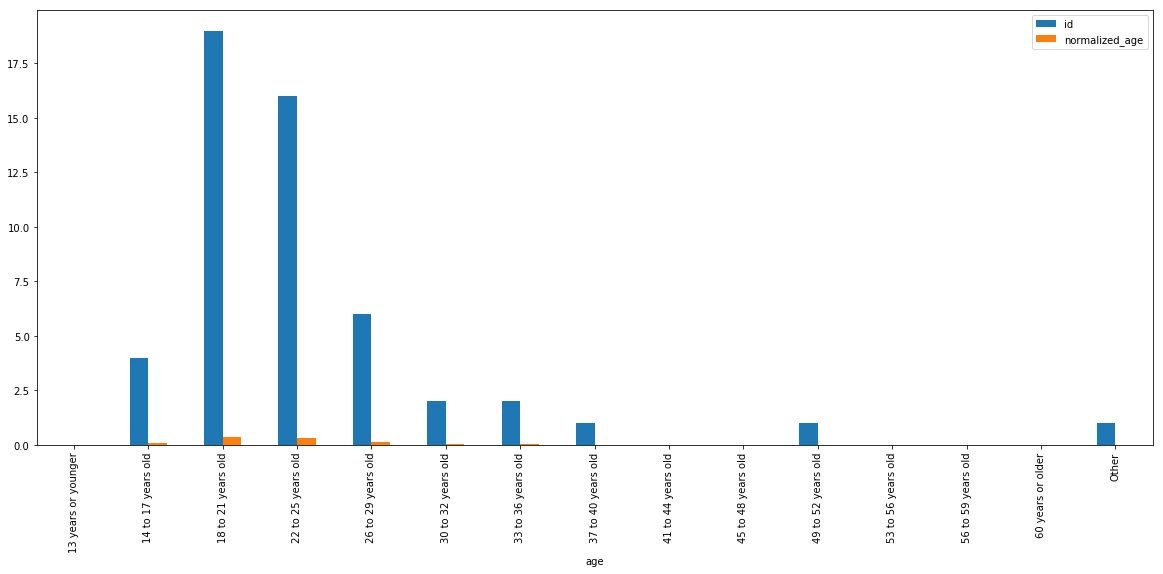

Dallas Mavericks


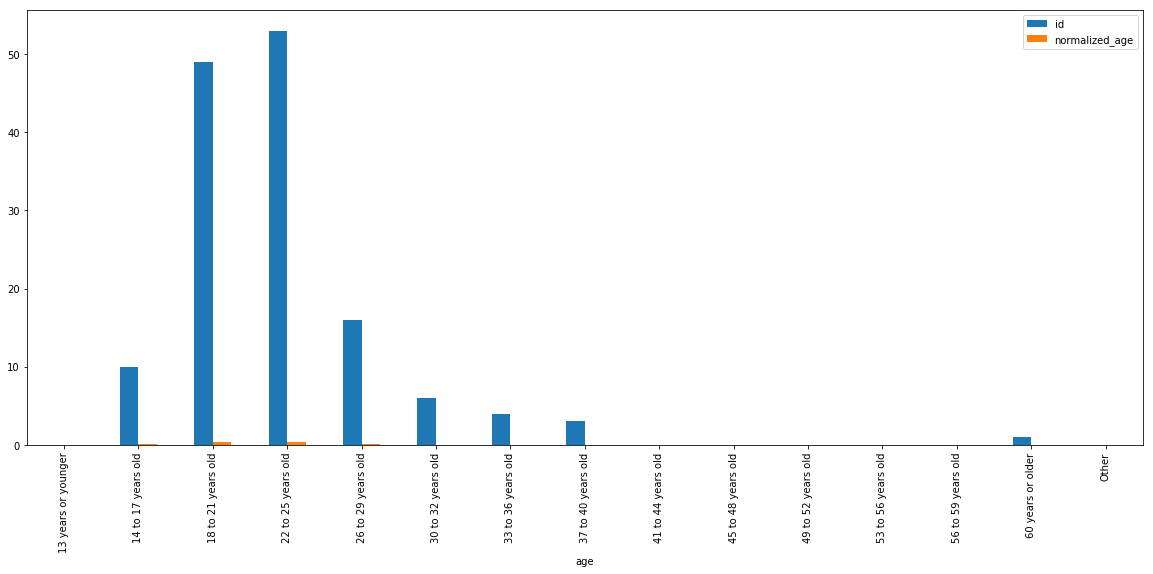

Seattle Super Sonics


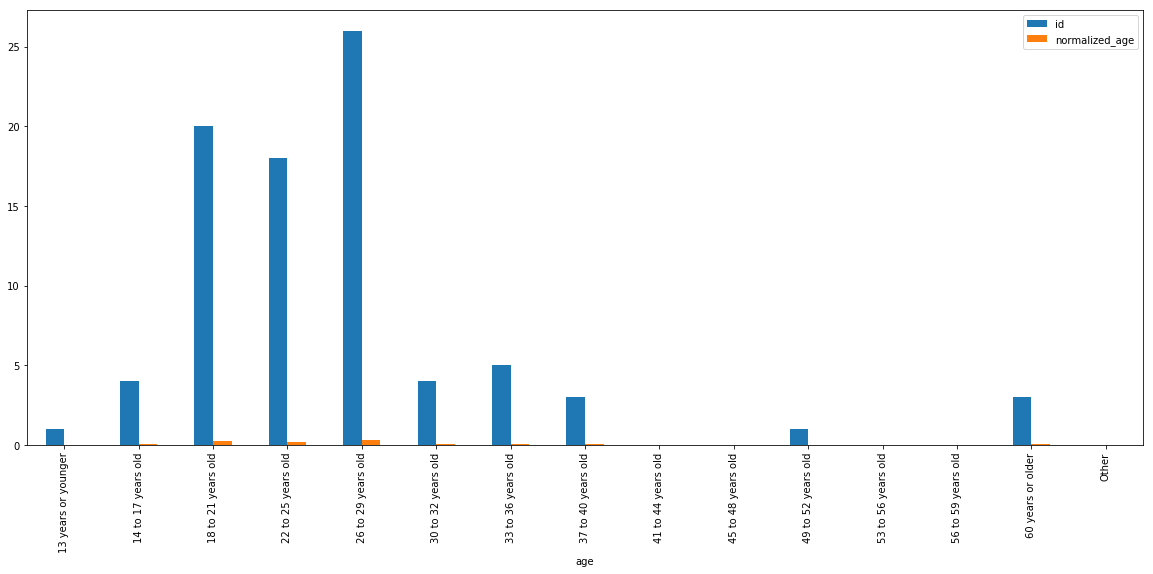

In [94]:
for team in teams:
    print team
    teamframe = team_age[team_age["team"] == team]
    teamframe = teamframe.set_index("age")
    teamframe.plot(kind='bar')
    plt.show()

In [97]:
# Who has the highest (normalized) number of <13yos?
# But I also thought 13yos weren't allowed on the internet?

team_age[team_age["age"] == "13 years or younger"].sort_values("normalized_age")

,team,age,id,normalized_age
459,Washington Wizards,13 years or younger,0,0.000000
339,Philadelphia 76ers,13 years or younger,0,0.000000
285,New York Knicks,13 years or younger,0,0.000000
270,New Orleans Pelicans,13 years or younger,0,0.000000
255,Minnesota Timberwolves,13 years or younger,0,0.000000
240,Milwaukee Bucks,13 years or younger,0,0.000000
210,Memphis Grizzlies,13 years or younger,0,0.000000
195,Los Angeles Lakers,13 years or younger,0,0.000000
354,Phoenix Suns,13 years or younger,0,0.000000
165,Indiana Pacers,13 years or younger,0,0.000000


In [137]:
# Where are the most transplants?
# The country field was open, so isn't a good way to get that data
# So sorry Raps fans, but I can't do anything for you.

# demographics["country"].unique()
# demographics["state"].unique()
# demographics.groupby("state").count()

states = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", 
          "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", 
          "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", 
          "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", 
          "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", 
          "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", 
          "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", 
          "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", 
          "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", 
          "Virginia", "Washington", "Washington D.C.", "West Virginia", "Wisconsin", "Wyoming"]

team_homes = ["Canada", "California", "Minnesota", "Texas", "Oregon", 
              "California", "Texas", "Ohio", "California", "New York", 
              "Oklahoma", "California", "Massachusetts", "Colorado", 
              "Illinois", "Michigan", "Arizona", "Pennsylvania", 
              "Wisconsin", "Washington D.C.", "New York", "Florida", 
              "Georgia", "Indiana", "Louisiana", "Utah", "North Carolina", 
              "Florida", "Tennessee", "Texas", "Washington"]

# Map to the list of NBA teams, exactly
team_state_dict = dict(zip(teams, team_homes))

# Clean states
team_state = demographics
team_state["state"] = demographics["state"].map(lambda x: x if x in states else "Other")
team_state["team"] = demographics["team"].map(lambda x: x if x in teams else "Other")
team_state["team_homes"] = demographics["team"].map(lambda x: team_state_dict[x] if x in teams else "Other")

team_state = team_state[["team", "state"]]
team_state

/Users/jaymahabal/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jaymahabal/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jaymahabal/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

,team,state
0,Other,Other
1,Other,Other
2,Other,Other
3,Other,Other
4,Toronto Raptors,New York
5,Sacramento Kings,California
6,Minnesota Timberwolves,South Dakota
7,San Antonio Spurs,Texas
8,Portland Trail Blazers,Texas
9,San Antonio Spurs,Utah


In [190]:
americans = team_state
americans = americans.reset_index()
americans = americans.groupby(['team', 'state']).count().reset_index()

# Add in rows for each age range not already covered

for team in teams+["Other"]:
    for state in states+["Other"]:
        if americans[(americans["team"] == team) & (americans["state"] == state)].empty:
            temp_row = pd.DataFrame([team, state, 0]).T
            temp_row.columns = ["team", "state", "index"]
            americans = pd.concat([americans, temp_row], axis=0)

americans = americans.sort_values(["team", "state"]).reset_index(drop=True)
americans.columns = ["team", "state", "count"]
americans

# 1664 entries, which is (31+1)*(51+1)
# Can be displayed via co-occurence matrix



,team,state,count
0,Atlanta Hawks,Alabama,5
1,Atlanta Hawks,Alaska,0
2,Atlanta Hawks,Arizona,1
3,Atlanta Hawks,Arkansas,0
4,Atlanta Hawks,California,4
5,Atlanta Hawks,Colorado,0
6,Atlanta Hawks,Connecticut,0
7,Atlanta Hawks,Delaware,0
8,Atlanta Hawks,Florida,1
9,Atlanta Hawks,Georgia,48


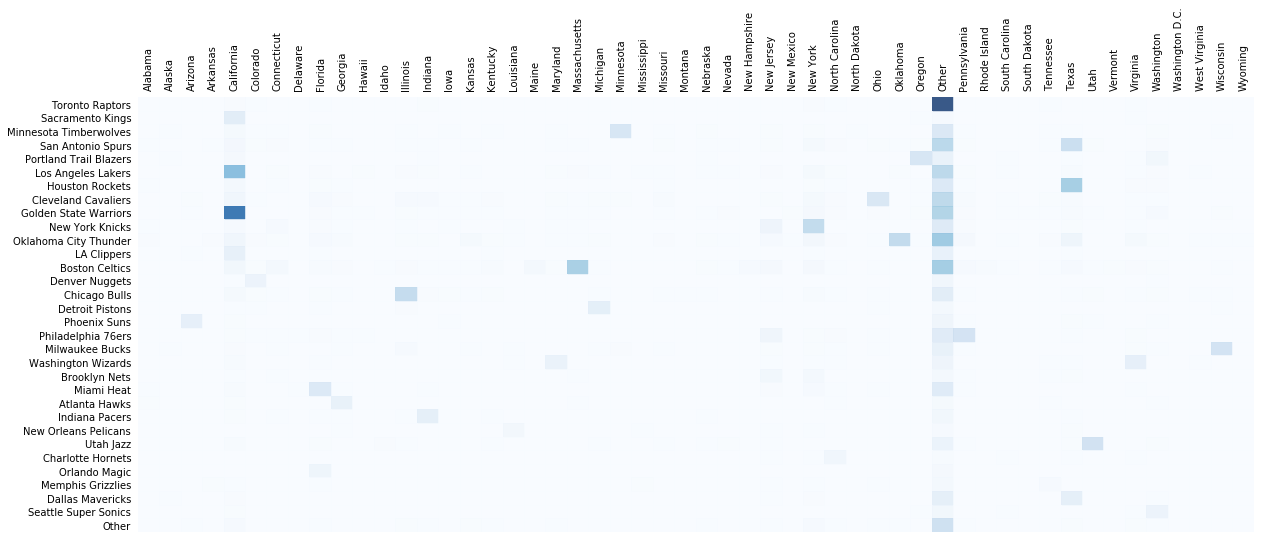

In [196]:

cooccurence_matrix = []
for team in teams+["Other"]:
#     print team
#     print list(americans[americans["team"] == team]["count"].values)
    cooccurence_matrix.append(list(americans[americans["team"] == team]["count"].values))

fig, ax = plt.subplots();
heatmap = ax.pcolor(cooccurence_matrix, cmap=plt.cm.Blues, alpha=0.8);

fig = plt.gcf();

ax.set_frame_on(False);

# put the major ticks at the middle of each cell
ax.set_yticks(np.arange(32) + 0.5, minor=False);
ax.set_xticks(np.arange(52) + 0.5, minor=False);

ax.invert_yaxis();
ax.xaxis.tick_top();
    
ax.set_xticklabels(sorted(states+["Other"]));
ax.set_yticklabels(teams+["Other"]);

plt.xticks(rotation=90)

ax.grid(False)

ax = plt.gca()

for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
    
plt.savefig('team_homes')

In [76]:
# Now, let's get to the good stuff: who's the consensus NBA MVP etc.
# Grouped box plots?

In [139]:
len(states)

51